# Image Classification of Hand-Written Characters
Growing up, most of my teachers in school had a single recurrent issue with me. It wasn't bad behavior or poor grades but it was always that my handwriting was not legible. This led to quite a few ordeals at home as my mom would constantly have me practice so I can improve my handwriting, but as time went on it only got worse. Today with advances in technology such as neural networks, I feel that recognizing hand-written characters should be a thing of the the past.

Through this project I will be trying to understand the working of Neural Networks and decipher my own hand-written characters using a model trained on the extended version of the MNIST dataset with numbers, lowercase and uppercase letters. We will be creating a Neural Network Class from scratch to classify images of 1s and 0s and also use Keras with Tensorflow as backend to build ANN and CNN models, compare their performance on the full dataset and implement the most accurate one on some images of my own handwriting.

## Contents
1. Data Exploration and Pre-Processing
2. Creating ANN from scratch
2. Artificial Neural Network Approach
3. Convolutional Neural Network Approach
4. Deployment of Final Model and Conclusion

### 1. Data Exploration and Pre-Processing
The dataset we will be using in this project is the Extended MNIST (EMINST) dataset which contains sample images of hand-written numbers, lowercase and uppercase letters which I obtained from Kaggle. All the classes in this datset are balanced and the images are of white characters on black backgrounds.

In [1]:
# Loading Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# Loading Train and Test Dataset
df_train = pd.read_csv("emnist-balanced-train.csv",header=None)
df_test = pd.read_csv("emnist-balanced-test.csv",header=None)
print('Training Dataset Shape: ',df_train.shape)
print('Testing Dataset Shape: ',df_test.shape)
df_train.head()

Training Dataset Shape:  (112800, 785)
Testing Dataset Shape:  (18800, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see, each row in this dataset represents a single 28x28 pixel image with the first column giving us the label and the next 784 columns giving us the pixel values.

In [3]:
# Splitting Features(X) and Labels(y)
X_train = df_train.loc[:,1:]
y_train = df_train.loc[:,0]
X_test = df_test.loc[:,1:]
y_test = df_test.loc[:,0]

Using the EMINST mapping file, we will be creating a dictionary that maps each label in the datset to the corresponding UTF value.

In [4]:
# Creating Mapping Datframe
map_df = pd.DataFrame({(0 , 48),(1 , 49),(2 , 50),(3 , 51),(4 , 52),(5 , 53),(6 , 54),(7 , 55),(8 , 56),(9 , 57),
(10 , 65),(11 , 66),(12 , 67),(13 , 68),(14 , 69),(15 , 70),(16 , 71),(17 , 72),(18 , 73),(19 , 74),(20 , 75),
(21 , 76),(22 , 77),(23 , 78),(24 , 79),(25 , 80),(26 , 81),(27 , 82),(28 , 83),(29 , 84),(30 , 85),(31 , 86),
(32 , 87),(33 , 88),(34 , 89),(35 , 90),(36 , 97),(37 , 98),(38 , 100),(39 , 101),(40 , 102),(41 , 103),(42 , 104),
(43 , 110),(44 , 113),(45 , 114),(46 , 116)},columns=['index','number'])
map_df['label'] = map_df['number'].apply(lambda x:chr(x))
map_df = map_df.sort_values('index')
map_df.reset_index(inplace=True)
map_df = map_df[['index','label']]
map_df

,index,label
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


In [5]:
label_mapping = dict(map_df.values)
print(label_mapping)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


In the next code cell we will be convering the label values into 46 binary categorical columns, one for each category using One-Hot Encoding.

In [6]:
# One Hot Encoding of Labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
print('X_train Shape: ',X_train.shape,type(X_train))
print('X_test Shape: ',X_test.shape,type(X_test))
print('y_train Shape: ',y_train.shape,type(y_train))
print('y_test Shape: ',y_test.shape,type(y_test))

X_train Shape:  (112800, 784) <class 'pandas.core.frame.DataFrame'>
X_test Shape:  (18800, 784) <class 'pandas.core.frame.DataFrame'>
y_train Shape:  (112800, 47) <class 'numpy.ndarray'>
y_test Shape:  (18800, 47) <class 'numpy.ndarray'>


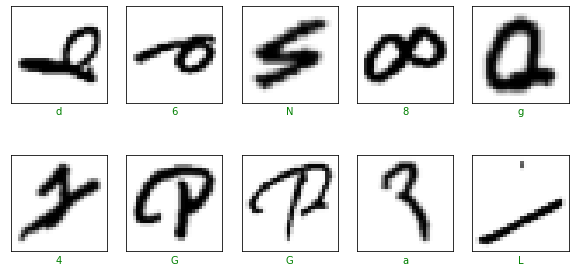

In [8]:
# Visualizing Some Training Samples
indices = np.random.choice(range(X_train.shape[0]), 10, replace=False)
    
X_show = X_train.iloc[indices]
y_show = y_train[indices]
    
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_show.iloc[i].values.reshape(28,28),cmap='binary')
    plt.xticks([])
    plt.yticks([])
    col = 'green'
    plt.xlabel(label_mapping[np.argmax(y_show[i])], color=col)
plt.show()

We can see on visualizing some random image sample that the images in the datset seem to be flipped and rotated. To aid in our understanding, we will flip and rotate all images in the training and test datset into readable versions.

In [9]:
# Rotating and Flipping all Images
def rotate_invert(pic):
    pic = pic.reshape(28,28)
    pic = np.fliplr(pic)
    pic = np.rot90(pic)
    return pic

X_train = np.apply_along_axis(rotate_invert, 1, X_train.values)
X_test = np.apply_along_axis(rotate_invert, 1, X_test.values)

In [10]:
print('X_train Shape: ',X_train.shape,type(X_train))
print('X_test Shape: ',X_test.shape,type(X_test))

X_train Shape:  (112800, 28, 28) <class 'numpy.ndarray'>
X_test Shape:  (18800, 28, 28) <class 'numpy.ndarray'>


On taking a closer look, we see that both our training and test datasets have been converted to numpy arrays and the individual images have 28x28 dimensions. We can now define a function to visualize random examples using numpy arrays as an input to prevent repeating lines of code. The function can also be equipped to take predicted values as input and display the predicted label with the image in green if it was correctly predicted and red if it was wrongly predicted.

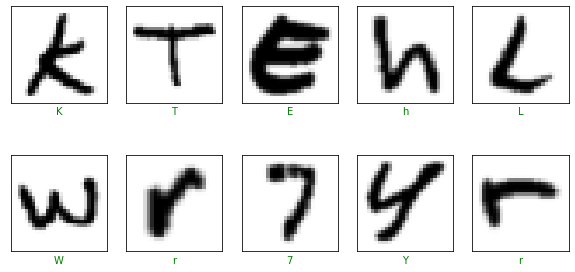

In [11]:
# Visualizing Rotated and Flipped Samples
def show_random_examples(X, y, p):
    indices = np.random.choice(range(X.shape[0]), 10, replace=False)
    
    X = X[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i],cmap='binary')
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(label_mapping[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(X_train, y_train, y_train)

In [12]:
# Looking at unique Pixel values of our images
print(np.unique(X_train))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

Taking a look at the pixel values, we can see that they range from 0 to 255. We can normailize these values to a 0 to 1 range by dividing all values in the training and test datasets by 255.

In [13]:
# Normalizing Pixel Values
X_train = X_train/255.
X_test = X_test/255.

In [14]:
print(np.unique(X_train))

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

### 2. Building ANN from scratch
To better understand how ANNs work and to be able to implement them more efficiently, we will be attempting to write a Neral Network Class from scratch and use it to classify images of 1s and 0s from our dataset.
The first step includes creating the class and defining initialization function where the class is created and obtains its parameters as inputs from the user.

We will also be defining a function to initialize weights and biases for the ANN. Since we will be using 1 input layer and 2 hidden layers connected to the output, we will be initializing 3 sets of weights and biases.

In [15]:
# Creating ANN Class and initializing weights and biases

class myNeuralNet:
    
    def __init__(self, layers = [47,128,128,1], learning_rate = 0.01, iterations = 100):
        self.layers = layers
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.param = {}
        self.loss = []
        self.X = None
        self.y = None
        
    def init_weights(self):
        np.random.seed(1)
        self.param['w1'] = np.random.randn(self.layers[0], self.layers[1])
        self.param['b1'] = np.random.randn(self.layers[1],)
        self.param['w2'] = np.random.randn(self.layers[1], self.layers[2])
        self.param['b2'] = np.random.randn(self.layers[2],)
        self.param['w3'] = np.random.randn(self.layers[2], self.layers[3])
        self.param['b3'] = np.random.randn(self.layers[3],)

We will be using activation functions relu for our dense layers and sigmoid for our output layer and will hence need to define them beforehand. We will also be defining the dRelu function for arrays to use later on.

In [16]:
# Defining Activation Functions

from scipy.special import expit

def relu(self,n):
    return np.maximum(0.0,n)

def dRelu(self,n):
    n[n<=0] = 0
    n[n>0] = 1
    return n

def sigmoid(self,n):
    return expit(n)

To get the best results, a Neural Network tends to focus on optimizing its outputs over several iterations. The measure we will be using to check how close our reusults are to the true values in this case will be the Cross-Entopy Loss. The lower the CE Loss, the better our results and our ANN will look to minimize it.

In [17]:
# Defining Cross-Entropy Loss Function

def zero_check(self,n):
    return np.maximum(n,0.0000000001)

def cross_ent_loss(self,y,yhat):
    samples = len(y)
    y_inv = 1.0 - y
    yhat_inv = 1.0 - y
    yhat = self.zero_check(yhat)
    yhat_inv = self.zero_check(yhat_inv)
    loss = (-1/samples)*(np.multiply(y,np.log(yhat))*np.multiply(y_inv,np.log(yhat_inv)))
    return loss

The process by which the network traverses from the input nodes towards the output node, calculating the values at each layer using the weights and biases is called forward propagation. Defined below is our function for forward propagation across 2 hidden layers.

In [18]:
# Defining function for forward propagation

def forward_prop(self):
    Z1 = self.X.dot(self.param['w1']) + self.param['b1']
    A1 = self.relu(Z1)
    Z2 = A1.dot(self.param['w2']) + self.param['b2']
    A2 = self.relu(Z2)
    Z3 = A2.dot(self.param['w3']) + self.param['b3']
    yhat = self.sigmoid(Z3)
    loss = self.cross_ent_loss(self.y,yhat)
    
    self.param['Z1'] = Z1
    self.param['A1'] = A1
    self.param['Z2'] = Z2
    self.param['A2'] = A2
    self.param['Z3'] = Z3    
    
    return yhat, loss

Once we complete one full cycle of forward propagation, our weights and biases need to be updated to reduce our loss function. We find the rate at which our weights and biases change w.r.t our loss function (gradient descent) using some differential calculus and use it to update them. This process is called backward propagation and is defined using the function below.

In [19]:
# Defining function for backward propagation

def back_prop(self,yhat):
    
    y_inv = 1.0 - self.y
    yhat_inv = 1.0 - yhat
    der_yhat = (-1)*(np.divide(self.y,self.zero_check(yhat))) + (np.divide(y_inv,self.zero_check(yhat_inv)))
    der_sigmoid = yhat*yhat_inv
    der_Z3 = der_yhat*der_sigmoid
    der_A2 = der_Z3.dot(self.param['w3'].T)
    der_w3 = self.param['A2'].T.dot(der_Z3)
    der_b3 = np.sum(der_Z3,axis=0,keepdims=True)
    der_Z2 = der_A2*self.dRelu(self.param['Z2'])
    der_A1 = der_Z2.dot(self.param['w2'].T)
    der_w2 = self.param['A1'].T.dot(der_Z2)
    der_b2 = np.sum(der_Z2,axis=0,keepdims=True)
    der_Z1 = der_A1*self.dRelu(self.param['Z1'])
    der_w1 = self.X.T.dot(der_Z1)
    der_b1= np.sum(der_Z1,axis=0,keepdims=True)
    
    self.param['w1'] = self.param['w1'] - self.learning_rate * der_w1
    self.param['w2'] = self.param['w2'] - self.learning_rate * der_w2
    self.param['w3'] = self.param['w3'] - self.learning_rate * der_w3
    self.param['b1'] = self.param['b1'] - self.learning_rate * der_b1
    self.param['b2'] = self.param['b2'] - self.learning_rate * der_b2
    self.param['b3'] = self.param['b3'] - self.learning_rate * der_b3

We would also need a function to train our neural network after creating it, hence we need to define a "fit" function as shown below so that it executes forward and backward propagation for given number of iterations.

In [20]:
# Defining Fit function for ANN Class

def fit(self,X,y):
    self.X = X
    self.y = y
    self.init_weights()
    
    for i in range(self.iterations):
        yhat, loss = self.forward_prop()
        self.back_prop(yhat)
        self.loss.append(loss)

We will also be defining a "predict" function that gives us the corresponding output values for given inputs using the weights and biases determined after training our ANN.

In [21]:
# Defining Predict function for ANN Class

def predict(self,X):
    Z1 = X.dot(self.param['w1']) + self.param['b1']
    A1 = self.relu(Z1)
    Z2 = A1.dot(self.param['w2']) + self.param['b2']
    A2 = self.relu(Z2)
    Z3 = A2.dot(self.param['w3']) + self.param['b3']
    y_pred = self.sigmoid(Z2)
    return np.round(y_pred)

Finally, we will create our complete class by collating our code from the previous cells.

In [22]:
# Compiling Code and Defining the myNeuralNet Class

class myNeuralNet():
    
    def __init__(self, layers = [784,128,128,1], learning_rate = 0.0001, iterations = 100):
        self.layers = layers
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.param = {}
        self.loss = []
        self.X = None
        self.y = None
        
    def init_weights(self):
        np.random.seed(1)
        self.param['w1'] = np.random.randn(self.layers[0], self.layers[1])
        self.param['b1'] = np.random.randn(self.layers[1],)
        self.param['w2'] = np.random.randn(self.layers[1], self.layers[2])
        self.param['b2'] = np.random.randn(self.layers[2],)
        self.param['w3'] = np.random.randn(self.layers[2], self.layers[3])
        self.param['b3'] = np.random.randn(self.layers[3],)        
    
    def relu(self,n):
        return np.maximum(0.0,n)
    
    def dRelu(self,n):
        n[n<=0] = 0
        n[n>0] = 1
        return n

    def sigmoid(self,n):
        return expit(n)
    
    def zero_check(self,n):
        return np.maximum(n,0.0000000001)

    def cross_ent_loss(self,y,yhat):
        samples = len(y)
        y_inv = 1.0 - y
        yhat_inv = 1.0 - y
        yhat = self.zero_check(yhat)
        yhat_inv = self.zero_check(yhat_inv)
        loss = (-1/samples)*(np.multiply(y,np.log(yhat))*np.multiply(y_inv,np.log(yhat_inv)))
        return loss
    
    def forward_prop(self):
        Z1 = self.X.dot(self.param['w1']) + self.param['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.param['w2']) + self.param['b2']
        A2 = self.relu(Z2)
        Z3 = A2.dot(self.param['w3']) + self.param['b3']
        yhat = self.sigmoid(Z3)
        loss = self.cross_ent_loss(self.y,yhat)

        self.param['Z1'] = Z1
        self.param['A1'] = A1
        self.param['Z2'] = Z2
        self.param['A2'] = A2
        self.param['Z3'] = Z3    

        return yhat, loss
    
    def back_prop(self,yhat):

        y_inv = 1.0 - self.y
        yhat_inv = 1.0 - yhat
        der_yhat = (-1)*(np.divide(self.y,self.zero_check(yhat))) + (np.divide(y_inv,self.zero_check(yhat_inv)))
        der_sigmoid = yhat*yhat_inv
        der_Z3 = der_yhat*der_sigmoid
        der_A2 = der_Z3.dot(self.param['w3'].T)
        der_w3 = self.param['A2'].T.dot(der_Z3)
        der_b3 = np.sum(der_Z3,axis=0,keepdims=True)
        der_Z2 = der_A2*self.dRelu(self.param['Z2'])
        der_A1 = der_Z2.dot(self.param['w2'].T)
        der_w2 = self.param['A1'].T.dot(der_Z2)
        der_b2 = np.sum(der_Z2,axis=0,keepdims=True)
        der_Z1 = der_A1*self.dRelu(self.param['Z1'])
        der_w1 = self.X.T.dot(der_Z1)
        der_b1= np.sum(der_Z1,axis=0,keepdims=True)

        self.param['w1'] = self.param['w1'] - self.learning_rate * der_w1
        self.param['w2'] = self.param['w2'] - self.learning_rate * der_w2
        self.param['w3'] = self.param['w3'] - self.learning_rate * der_w3
        self.param['b1'] = self.param['b1'] - self.learning_rate * der_b1
        self.param['b2'] = self.param['b2'] - self.learning_rate * der_b2
        self.param['b3'] = self.param['b3'] - self.learning_rate * der_b3        
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        self.init_weights()

        for i in range(self.iterations):
            yhat, loss = self.forward_prop()
            self.back_prop(yhat)
            self.loss.append(loss)
            
    def predict(self,X):
        Z1 = X.dot(self.param['w1']) + self.param['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.param['w2']) + self.param['b2']
        A2 = self.relu(Z2)
        Z3 = A2.dot(self.param['w3']) + self.param['b3']
        y_pred = self.sigmoid(Z3)
        return np.round(y_pred)

Since the Neural Network we have created is very simple and not optimal, we cannot use it on our complete dataset as it would not be very accurate and also take a really long time to train. Instead, we will be testing our ANN on a subset of our complete dataset containing only images of 1s and 0s and find how accurate it is.

In [23]:
# Preprocessing Images for Binary Classification
df_train_bin = df_train[df_train[0] <= 1]
df_test_bin = df_test[df_test[0] <= 1]

X_train_bin = df_train_bin.loc[:,1:]
y_train_bin = df_train_bin.loc[:,0]
X_test_bin = df_test_bin.loc[:,1:]
y_test_bin = df_test_bin.loc[:,0]

X_train_bin = np.apply_along_axis(rotate_invert, 1, X_train_bin.values)
X_test_bin = np.apply_along_axis(rotate_invert, 1, X_test_bin.values)

X_train_bin = X_train_bin/255.
X_test_bin = X_test_bin/255.

y_train_bin = np.reshape(np.array(y_train_bin),(4800,1))
y_test_bin = np.reshape(np.array(y_test_bin),(800,1))

X_train_bin_flat = np.reshape(X_train_bin, (4800, 784))
X_test_bin_flat = np.reshape(X_test_bin, (800, 784))

print('X_train_bin_flat Shape: ',X_train_bin_flat.shape,type(X_train_bin_flat))
print('X_test_bin_flat Shape: ',X_test_bin_flat.shape,type(X_test_bin_flat))
print('y_train_bin Shape: ',y_train_bin.shape,type(y_train_bin))
print('y_test_bin Shape: ',y_test_bin.shape,type(y_test_bin))

X_train_bin_flat Shape:  (4800, 784) <class 'numpy.ndarray'>
X_test_bin_flat Shape:  (800, 784) <class 'numpy.ndarray'>
y_train_bin Shape:  (4800, 1) <class 'numpy.ndarray'>
y_test_bin Shape:  (800, 1) <class 'numpy.ndarray'>


In [24]:
# Fitting ANN Model
myNN = myNeuralNet()
myNN.fit(X_train_bin_flat,y_train_bin)

In [25]:
# Calculating Accuracy on Training and Test Set
y_pred = myNN.predict(X_train_bin_flat)
print("Training Set Accuracy: {}%".format(int(sum(y_train_bin == y_pred) / len(y_train_bin) * 100)))

y_pred = myNN.predict(X_test_bin_flat)
print("Test Set Accuracy: {}%".format(int(sum(y_test_bin == y_pred) / len(y_test_bin) * 100)))

Training Set Accuracy: 98%
Test Set Accuracy: 97%


We find that our ANN has given us a really good accuracy of ~97% on our test dataset of 1s and 0s. However this would be significantly lower if we were to train it on our entire dataset. We can see some of our predictions visualized below.

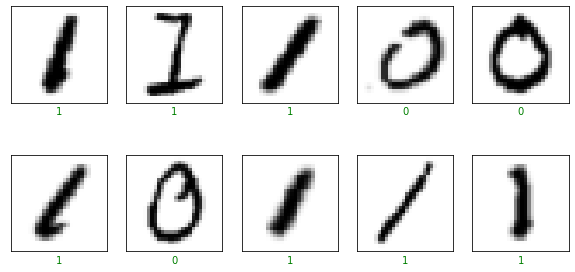

In [26]:
# Visualizing some predictions
indices = np.random.choice(range(X_test_bin_flat.shape[0]), 10, replace=False)
    
X_show = X_test_bin_flat[indices]
y_show = y_test_bin[indices]
p_show = y_pred[indices]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_show[i].reshape(28,28),cmap='binary')
    plt.xticks([])
    plt.yticks([])
    col = 'green' if int(y_show[i]) == int(p_show[i]) else 'red'
    plt.xlabel(int(p_show[i]), color=col)
plt.show()

### 3. Artificial Neural Network Approach
The first model we will be using through Keras with Tensorflow backend is a simple ANN with only Dense layers and 2 hidden layers. ANNs can be  used for classification of simple images but tend to lose accuracy when there is shift in position of pixels or when we are trying to identify particular features.

We will be converting our images from 28x28 to 784 flattened pixels format so it can be fed to the ANN.

In [27]:
# Flattening Images
X_train_flat = np.reshape(X_train, (112800, 784))
X_test_flat = np.reshape(X_test, (18800, 784))
print('X_train_flat Shape: ',X_train_flat.shape,type(X_train_flat))
print('X_test_flat Shape: ',X_test_flat.shape,type(X_test_flat))

X_train_flat Shape:  (112800, 784) <class 'numpy.ndarray'>
X_test_flat Shape:  (18800, 784) <class 'numpy.ndarray'>


In [28]:
# Building ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(47, activation = 'softmax')
])

In [29]:
# Compiling ANN
ann.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 47)                6063      
Total params: 139,567
Trainable params: 139,567
Non-trainable params: 0
_________________________________________________________________


In [30]:
%%time
# Training ANN

h1 = ann.fit(
    X_train_flat, y_train,
    validation_data=(X_test_flat, y_test),
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2),
        tf.keras.callbacks.ModelCheckpoint('models_ann/ann_best_model.h5', save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
    ]
)

Epoch 1/10
3525/3525 [==============================] - 11s 3ms/step - loss: 0.9368 - accuracy: 0.7147 - val_loss: 0.6801 - val_accuracy: 0.7847
Epoch 2/10
3525/3525 [==============================] - 11s 3ms/step - loss: 0.5832 - accuracy: 0.8059 - val_loss: 0.5839 - val_accuracy: 0.8085
Epoch 3/10
3525/3525 [==============================] - 10s 3ms/step - loss: 0.5055 - accuracy: 0.8265 - val_loss: 0.5338 - val_accuracy: 0.8259
Epoch 4/10
3525/3525 [==============================] - 11s 3ms/step - loss: 0.4587 - accuracy: 0.8403 - val_loss: 0.5306 - val_accuracy: 0.8262
Epoch 5/10
3525/3525 [==============================] - 10s 3ms/step - loss: 0.4280 - accuracy: 0.8484 - val_loss: 0.5467 - val_accuracy: 0.8243
Epoch 6/10
3525/3525 [==============================] - 10s 3ms/step - loss: 0.4015 - accuracy: 0.8554 - val_loss: 0.5385 - val_accuracy: 0.8252
CPU times: user 2min 6s, sys: 12.2 s, total: 2min 18s
Wall time: 1min 5s


In [31]:
acc = h1.history['accuracy']
val_acc = h1.history['val_accuracy']
loss = h1.history['loss']
val_loss = h1.history['val_loss']
epochs = range(1,len(acc)+1)

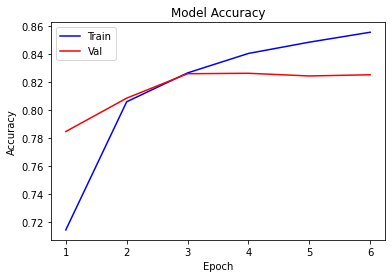

In [32]:
# Plotting Accuracy Curve
plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'r')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

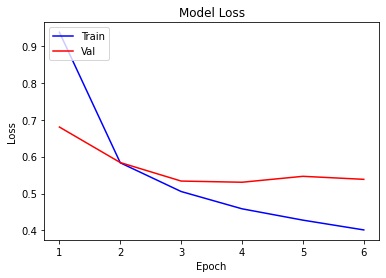

In [33]:
# Plotting Loss Curve
plt.plot(epochs, loss, 'b')
plt.plot(epochs, val_loss, 'r')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [34]:
# Finding Test Set Accuracy of Best Model
model = tf.keras.models.load_model('models_ann/ann_best_model.h5')
loss, accuracy = model.evaluate(X_test_flat, y_test)

print('ANN Test Set Accuracy: ', accuracy * 100,'%')

588/588 [==============================] - 1s 2ms/step - loss: 0.5306 - accuracy: 0.8262
ANN Test Set Accuracy:  82.62234330177307 %


After training over 10 epochs, we find that the ANN model with the best results on test data gave us an accuracy of **~83%.**

### 4. Convolutional Neural Network Aproach
The next approach we will be using is a CNN with two sets of convolution and max-pooling layers followed by a flattening layer connected to a simple ANN. CNNs provide an edge over simple ANNs for image recognition as they are more suited to identifying features and their performance is not affected by shift in location of these features.

To convert the training and test datasets into suitable format for the CNN, we will be changing their shape to 28x28x1.

In [35]:
# Changing Input Shape
X_train_cnn = np.reshape(X_train, (112800, 28, 28, 1))
X_test_cnn = np.reshape(X_test, (18800, 28, 28, 1))
print('X_train_cnn Shape: ',X_train_cnn.shape,type(X_train_cnn))
print('X_test_cnn Shape: ',X_test_cnn.shape,type(X_test_cnn))

X_train_cnn Shape:  (112800, 28, 28, 1) <class 'numpy.ndarray'>
X_test_cnn Shape:  (18800, 28, 28, 1) <class 'numpy.ndarray'>


In [36]:
# Building CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

cnn = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(47, activation='softmax')
])

In [37]:
# Compiling CNN
cnn.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_5 (Dense)              (None, 47)               

In [38]:
%%time
# Training CNN

h2 = cnn.fit(
    X_train_cnn, y_train,
    validation_data=(X_test_cnn, y_test),
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2),
        tf.keras.callbacks.ModelCheckpoint('models_cnn/cnn_best_model.h5', save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
    ]
)

Epoch 1/10
3525/3525 [==============================] - 205s 58ms/step - loss: 0.7382 - accuracy: 0.7700 - val_loss: 0.5140 - val_accuracy: 0.8296
Epoch 2/10
3525/3525 [==============================] - 211s 60ms/step - loss: 0.4295 - accuracy: 0.8521 - val_loss: 0.4380 - val_accuracy: 0.8560
Epoch 3/10
3525/3525 [==============================] - 95s 27ms/step - loss: 0.3698 - accuracy: 0.8695 - val_loss: 0.4080 - val_accuracy: 0.8607
Epoch 4/10
3525/3525 [==============================] - 95s 27ms/step - loss: 0.3349 - accuracy: 0.8788 - val_loss: 0.3902 - val_accuracy: 0.8695
Epoch 5/10
3525/3525 [==============================] - 94s 27ms/step - loss: 0.3104 - accuracy: 0.8863 - val_loss: 0.3820 - val_accuracy: 0.8710
Epoch 6/10
3525/3525 [==============================] - 95s 27ms/step - loss: 0.2891 - accuracy: 0.8921 - val_loss: 0.3906 - val_accuracy: 0.8654
Epoch 7/10
3525/3525 [==============================] - 95s 27ms/step - loss: 0.2725 - accuracy: 0.8965 - val_loss: 0.3858

In [39]:
acc = h2.history['accuracy']
val_acc = h2.history['val_accuracy']
loss = h2.history['loss']
val_loss = h2.history['val_loss']
epochs = range(1,len(acc)+1)

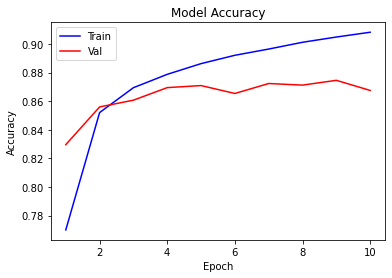

In [40]:
# Plotting Accuracy Curve
plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'r')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

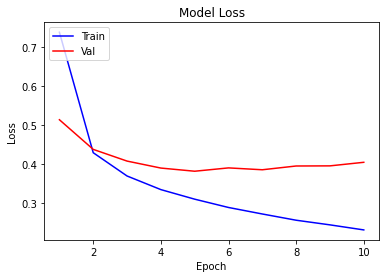

In [41]:
# Plotting Loss Curve
plt.plot(epochs, loss, 'b')
plt.plot(epochs, val_loss, 'r')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [42]:
# Finding Test Set Accuracy of Best Model
model = tf.keras.models.load_model('models_cnn/cnn_best_model.h5')
loss, accuracy = model.evaluate(X_test_cnn, y_test)

print('CNN Test Set Accuracy: ', accuracy * 100,'%')

588/588 [==============================] - 4s 7ms/step - loss: 0.3958 - accuracy: 0.8746
CNN Test Set Accuracy:  87.46276497840881 %


Our best CNN model has an accuracy of **~87%**. This is slightly better than our best ANN model. Since the images we are working with are quite uniform and simple, we see a smaller difference between ANN and CNN performance. However, if the images were more complex with larger number of features, the CNN wouldve shown much better performance compared to the ANN.

### 5. Deployment of Final Model and Conclusion

In [43]:
# Loading Best Model
final_model = tf.keras.models.load_model('models_cnn/cnn_best_model.h5')

preds = final_model.predict(X_test_cnn)

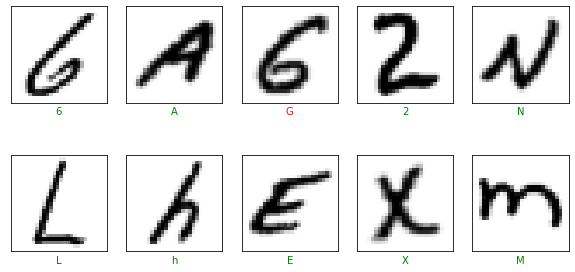

In [44]:
# Visualizing Model Predictions
show_random_examples(X_test_cnn, y_test, preds)

In [45]:
# Displaying Accuracy and Loss of Final Model
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print('Final Model Accuracy:',accuracy*100,'%')
print('Final Model Loss:',loss)

588/588 [==============================] - 4s 8ms/step - loss: 0.3958 - accuracy: 0.8746
Final Model Accuracy: 87.46276497840881 %
Final Model Loss: 0.3957836627960205


To find out where our model is making its mistakes, we'll be creating a confusion matrix.

In [46]:
# Obtaining Confusion Matrix
y_test_labels = [np.argmax(i) for i in y_test]
y_pred_labels = [np.argmax(i) for i in preds]

cm = tf.math.confusion_matrix(labels=y_test_labels,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(47, 47), dtype=int32, numpy=
array([[302,   0,   0, ...,   0,   0,   0],
       [  0, 280,   1, ...,   0,   0,   0],
       [  0,   0, 374, ...,   0,   0,   0],
       ...,
       [  0,   0,   2, ..., 231,   0,   0],
       [  0,   0,   0, ...,   0, 377,   0],
       [  0,   2,   0, ...,   0,   4, 355]], dtype=int32)>

Text(204.0, 0.5, 'Truth')

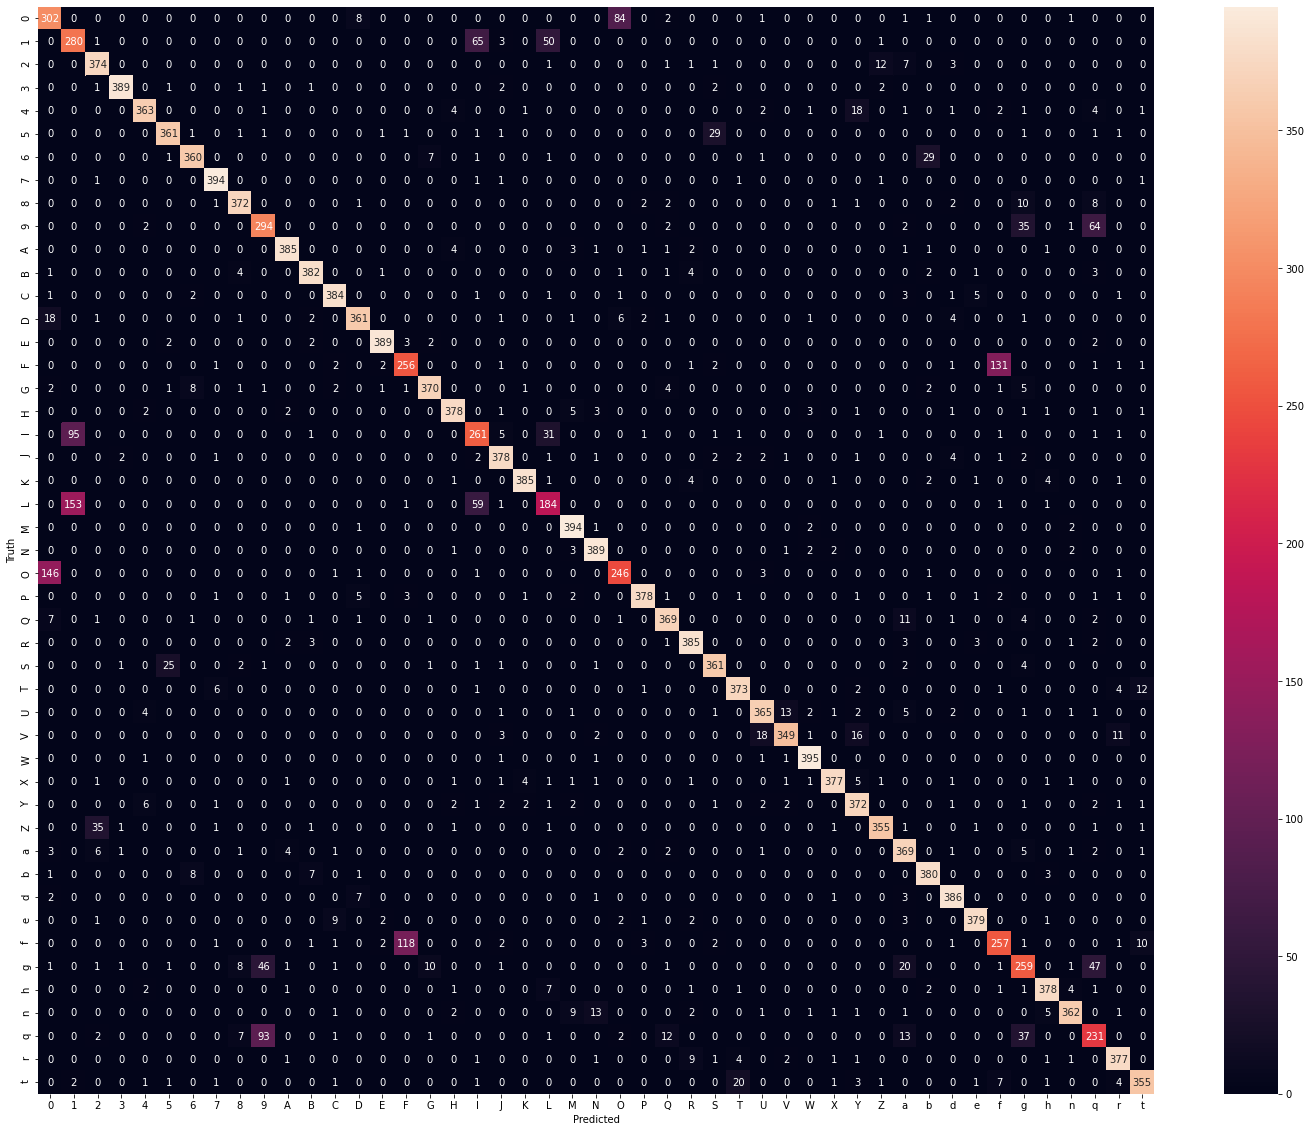

In [47]:
# Visualizing Confusion Matrix
plt.figure(figsize = (25,20))
sns.heatmap(cm, annot=True, fmt='d')
plt.xticks([i+0.5 for i in range(0,47)],[label_mapping[i] for i in range(0,47)])
plt.yticks([i+0.5 for i in range(0,47)],[label_mapping[i] for i in range(0,47)])
plt.xlabel('Predicted')
plt.ylabel('Truth')

Through the confusion matrix, we can see the areas where our model was mis-classifying images. Some of these were expected, such as O and 0, 9 and q, F and f. We also see some other mistakes like 1 and L, 9 and g, 6 and b. These would be areas where humans would also make errors.

In the final part of our project we will be using our trained model to try and predict characters that I hand-wrote myself. We will be using the Python Imaging Library (PIL) to read the images and convert them to MNIST format. First they need to be converted to size of 28x28 pixels. Since the images are of black characters against white background, we can convert them to white characters against black backgrounds by inverting them after converting them to grayscale.

In [48]:
# Loading and Pre-processing Images
from PIL import Image, ImageOps

hand_images = np.zeros(shape=(10,28,28))

for i in range(0,10):
    hand = Image.open("Images/Image"+str(i+1)+".png")
    hand = hand.resize((28,28))
    hand = ImageOps.grayscale(hand)
    hand = ImageOps.invert(hand)
    hand_images[i] = np.array(hand)

hand_images.shape

(10, 28, 28)

In [49]:
# Reshaping Images
hand_images = np.reshape(hand_images, (10,28,28,1))
pred_hand = final_model.predict(hand_images)

In [50]:
# Adding True Labels for Images
hand_labels = [10,13,27,15,3,2,5,45,39,42]
hand_labels = to_categorical(hand_labels)

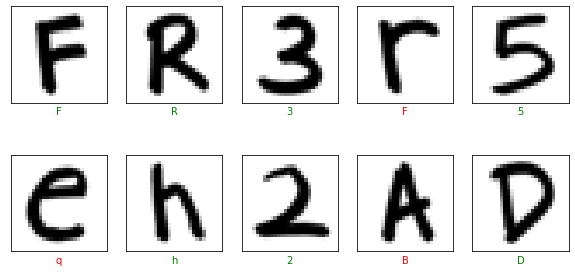

In [51]:
# Visualizing the Images and the Predictions
show_random_examples(hand_images,hand_labels,pred_hand)

Of the 10 images loaded, our model correctly predicted 7 of them.

Through this project we successfully created our own ANN from scratch and used it for a simple classification problem. We then used Keras with Tensorflow as a backend to build an ANN and CNN model to classify simple images and also compared their performance. However, the most exciting part of this project for me was using the model I built to recognise my own hand-writing. Turns out my handwriting isn't so illegible after all! This project was another effort of mine to use Data Science and Machine Learning to solve problems I see around me and has helped me understand new concepts that I can use to solve more complex problems down the line.